In [9]:
# Disponivel em: https://github.com/brazil-data-cube/code-gallery/blob/master/jupyter/events/big-techtalks/2025-love-data-day/ldd_2025_01-sentinel-2.ipynb

In [11]:
#!pip install wtss==2.0.0a3

In [2]:
# Área de exibição de camadas (mapa) e mapas base (basemaps)
from ipyleaflet import Map, basemaps, basemap_to_tiles

# Controles sobre o mapa
from ipyleaflet import FullScreenControl, LayersControl, ScaleControl, SplitMapControl, WidgetControl

# Tipos de Camadas
from ipyleaflet import GeoJSON, TileLayer

# Layout
from ipywidgets import IntSlider, Layout

In [7]:
# Abrindo shapefile
import geopandas as gpd

# para abrir shapefile
# shapefile = "/home/jovyan/data/area.shp"
# my_shp = gpd.read_file(shapefile)
# my_shp.head()

# ou abrir da seguinte forma
import io
import os
import requests
import tempfile
import zipfile

zipfile_url = "https://raw.githubusercontent.com/brazil-data-cube/code-gallery/refs/heads/master/jupyter/events/big-techtalks/2025-love-data-day/data/area.zip"
response = requests.get(zipfile_url)
with tempfile.TemporaryDirectory() as tmpdir:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall(tmpdir)

        shp_file = [f for f in os.listdir(tmpdir) if f.endswith('.shp')][0]
        shp_path = os.path.join(tmpdir, shp_file)

        my_shp = gpd.read_file(shp_path)

        geometry_union = my_shp.geometry.unary_union
        bbox = geometry_union.bounds
        centroide = geometry_union.centroid
my_shp

/tmp/ipykernel_1271/1096997108.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geometry_union = my_shp.geometry.unary_union


name                                           geometry
0  None  POLYGON ((-51.4 -30.2, -51.4 -29.95, -51.1 -29...

In [8]:
geometry_union = my_shp.geometry.union_all()
centroide = geometry_union.centroid
bbox = geometry_union.bounds

bbox

(-51.4, -30.2, -51.1, -29.95)

In [10]:
# criar camada para armazenar as info desse poligono
import shapely

camada_poly = GeoJSON(
    name="Polígono",
    data=shapely.geometry.mapping(geometry_union),
    style={ 'color': 'SteelBlue', 'opacity': 1, 'fillOpacity': 0.1, 'weight': 5 },
    hover_style={ 'color': 'IndianRed', 'opacity': 1, 'fillOpacity': 0.1, 'weight': 5 }
)

In [12]:
# visualizar onde esta area
mapa = Map(zoom=10,
           scroll_wheel_zoom=True,
           center=(centroide.y, centroide.x), # [lat, lon]
           layout=Layout(width='80%', height='500px')
           )
mapa.add(camada_poly)
mapa

Map(center=[-30.075, -51.24999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_…

In [14]:
import pystac_client
pystac_client.__version__

'0.8.6'

In [15]:
catalogo = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')
catalogo

<Client id=INPE>

In [18]:
catalogo.id

'INPE'

In [19]:
catalogo.title

'INPE STAC Server'

In [20]:
catalogo.description

'This is the landing page for the INPE STAC server. The SpatioTemporal Asset Catalogs (STAC) provide a standardized way to expose collections of spatial temporal data. Here you will find collections of data provided by projects and areas of INPE.'

In [21]:
for colecao in catalogo.get_collections():
    print(f"{colecao.id}: {colecao.title}", end="\n"*2)

CB4-WFI-L2-DN-1: CBERS-4/WFI - Level-2-DN

EtaCCDay_CMIP5-1: Eta Model - Climate Change - CMIP5 - Day

CB4A-WPM-L4-DN-1: CBERS-4A/WPM - Level-4-DN

mosaic-cbers4a-paraiba-3m-1: CBERS-4A/WFI Image Mosaic of Brazil Paraíba State - 3 Months

LCC_L8_30_16D_STK_Cerrado-1: LCC - Cerrado - LC8 30m 16D STK

mosaic-landsat-sp-6m-1: Landsat Image Mosaic of São Paulo State - 6 months

CB2B-CCD-L2-DN-1: CBERS-2B/CCD - Level-2-DN

mosaic-s2-paraiba-3m-1: Sentinel-2 image Mosaic of Brazilian Paraiba State - 3 Months

sentinel-3-olci-l1-bundle-1: Sentinel-3/OLCI - Level-1B Full Resolution

LCC_L8_30_16D_STK_MataAtlantica-1: LCC - Mata Atlantica - LC8 30m 16D STK

mosaic-s2-yanomami_territory-6m-1: Sentinel-2 image Mosaic of Brazilian Yanomami Indigenous Territory - 6 Months

LCC_L8_30_16D_STK_Pantanal-1: LCC - Pantanal - LC8 30m 16D STK

LCC_L8_30_1M_STK_Cerrado-1: LCC - Cerrado - LC8 30m 1M STK

MODISA-OCSMART-RRS-MONTHLY-1: MODIS-Aqua Monthly Rrs - OC-SMART AC

sentinel-1-grd-bundle-1: Sentinel-1 -

In [22]:
sentinel2 = catalogo.get_collection("S2_L2A-1")
sentinel2

<CollectionClient id=S2_L2A-1>

In [23]:
import itertools

for item in itertools.islice(sentinel2.get_items(), 20):
    print(f"{item.id}")

S2C_MSIL2A_20250602T145751_N0511_R039_T19MFP_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T18MZS_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19NDC_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19LEL_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19MFR_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19NGA_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19MFQ_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T18LZQ_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19MFS_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19MEN_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19NFB_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19NFC_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19NFA_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19LDK_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19MDN_20250602T195314
S2C_MSIL2A_20250602T145751_N0511_R039_T19MFU_20250602T195314
S2C_MSIL2A_20250602T1457

In [24]:
item

<Item id=S2C_MSIL2A_20250602T145751_N0511_R039_T19NEB_20250602T195314>

In [25]:
item_search = catalogo.search(
    collections=[sentinel2],
    bbox=bbox,
    datetime='2024-04-20/2024-05-07',
    query = {
      "eo:cloud_cover": {
          "lt" : 60
      }
    },
    limit = 100
)

In [26]:
item_search.matched()

5

In [27]:
item_search = catalogo.search(
    collections=[sentinel2],
    bbox=bbox,
    datetime='2024-04-20/2024-05-07',
    limit = 100
)

In [28]:

item_search.matched()

8

In [29]:
item_search = catalogo.search(
    collections = [sentinel2],
    intersects = geometry_union,
    datetime = '2024-04-20/2024-05-07',
    limit = 100
)

In [30]:

for i, item in enumerate(item_search.items()):
    print(i, item.id, sep='\t')

0	S2B_MSIL2A_20240506T133149_N0510_R081_T22JDM_20240506T154438
1	S2B_MSIL2A_20240503T132229_N0510_R038_T22JDM_20240503T153146
2	S2A_MSIL2A_20240501T133151_N0510_R081_T22JDM_20240501T195952
3	S2A_MSIL2A_20240428T132241_N0510_R038_T22JDM_20240428T182552
4	S2B_MSIL2A_20240426T133149_N0510_R081_T22JDM_20240426T154730
5	S2B_MSIL2A_20240423T132229_N0510_R038_T22JDM_20240423T151216
6	S2B_MSIL2A_20240423T132229_N0510_R038_T22JDM_20240423T142703
7	S2A_MSIL2A_20240421T133151_N0510_R081_T22JDM_20240421T204952


In [31]:
items_list = list(item_search.items())
items_list

[<Item id=S2B_MSIL2A_20240506T133149_N0510_R081_T22JDM_20240506T154438>,
 <Item id=S2B_MSIL2A_20240503T132229_N0510_R038_T22JDM_20240503T153146>,
 <Item id=S2A_MSIL2A_20240501T133151_N0510_R081_T22JDM_20240501T195952>,
 <Item id=S2A_MSIL2A_20240428T132241_N0510_R038_T22JDM_20240428T182552>,
 <Item id=S2B_MSIL2A_20240426T133149_N0510_R081_T22JDM_20240426T154730>,
 <Item id=S2B_MSIL2A_20240423T132229_N0510_R038_T22JDM_20240423T151216>,
 <Item id=S2B_MSIL2A_20240423T132229_N0510_R038_T22JDM_20240423T142703>,
 <Item id=S2A_MSIL2A_20240421T133151_N0510_R081_T22JDM_20240421T204952>]

In [32]:
items = item_search.item_collection()
items

In [33]:
item = items[-1]
item

<Item id=S2A_MSIL2A_20240421T133151_N0510_R081_T22JDM_20240421T204952>

In [34]:

item.assets

{'AOT': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_AOT_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif>,
 'B01': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_B01_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif>,
 'B02': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_B02_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif>,
 'B03': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_B03_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif>,
 'B04': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_B04_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif>,
 'B05': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_B05_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif>,
 'B06': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_B06_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif>,
 'B07'

In [35]:
B04 = item.assets['B04']
B04

<Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_B04_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif>

In [36]:

B04.href

'https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/04/S2A_B04_20240421T133151_N0510_R081_T22JDM_20240421T204952.tif'

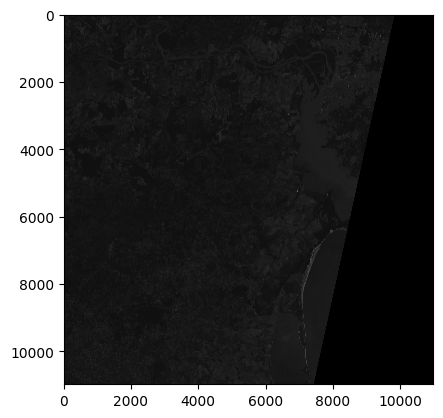

In [37]:
# Visualizar
# !pip install rasterio

import rasterio
from matplotlib import pyplot as plt

with rasterio.open(B04.href) as src:
    band = src.read(1)

plt.imshow(band, cmap='gray')
plt.show()

In [38]:
# recuperar parte de imagem
import numpy as np
from rasterio.windows import from_bounds, Window

from rasterio.warp import transform_bounds
from rasterio.windows import transform as window_transform

def read_img(uri: str, bbox: tuple = None, bbox_crs: str = "EPSG:4326", masked: bool = True):
    """Read raster window as numpy.ma.masked_array."""
    with rasterio.open(uri) as src:
        if bbox is not None:
            # reprojeta o bbox para o CRS do raster
            projected_bbox = transform_bounds(bbox_crs, src.crs, *bbox)
            window = from_bounds(*projected_bbox, transform=src.transform)
            data = src.read(window=window, masked=masked)
            new_transform = rasterio.windows.transform(window, src.transform)

            profile = src.profile.copy()
            profile.update({
                "height": window.height,
                "width": window.width,
                "transform": new_transform
            })
        else:
            data = src.read(masked=masked)
            profile = src.profile

    return data, profile

def normalize_and_adjust_brightness(array, brightness_factor=1):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    normalized = (array - array_min) / (array_max - array_min)
    brightened = np.clip(normalized * brightness_factor, 0.0, 1.0)
    return brightened

In [39]:
assets = items[0].assets
assets

{'AOT': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/05/S2B_AOT_20240506T133149_N0510_R081_T22JDM_20240506T154438.tif>,
 'B01': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/05/S2B_B01_20240506T133149_N0510_R081_T22JDM_20240506T154438.tif>,
 'B02': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/05/S2B_B02_20240506T133149_N0510_R081_T22JDM_20240506T154438.tif>,
 'B03': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/05/S2B_B03_20240506T133149_N0510_R081_T22JDM_20240506T154438.tif>,
 'B04': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/05/S2B_B04_20240506T133149_N0510_R081_T22JDM_20240506T154438.tif>,
 'B05': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/05/S2B_B05_20240506T133149_N0510_R081_T22JDM_20240506T154438.tif>,
 'B06': <Asset href=https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/05/S2B_B06_20240506T133149_N0510_R081_T22JDM_20240506T154438.tif>,
 'B07'

In [40]:
blue_asset = assets['B02']
green_asset = assets['B03']
red_asset = assets['B04']
nir_asset = assets['B08']

blue_asset.href

'https://data.inpe.br/bdc/data/S2_L2A/v001/22/J/DM/2024/05/S2B_B02_20240506T133149_N0510_R081_T22JDM_20240506T154438.tif'

In [41]:
b02_image, profile = read_img(items[-1].assets['B02'].href, bbox)
b03_image, _ = read_img(items[-1].assets['B03'].href, bbox)
b04_image, _ = read_img(items[-1].assets['B04'].href, bbox)
b08_image, _ = read_img(items[-1].assets['B08'].href, bbox)

In [42]:
b03_image

masked_array(
  data=[[[1998, 1938, 1946, ..., 1960, 2298, 3338],
         [1959, 1872, 1890, ..., 2892, 2350, 3034],
         [1966, 1922, 1894, ..., 3700, 2622, 2426],
         ...,
         [1577, 1602, 1610, ...,    0,    0,    0],
         [1608, 1592, 1598, ...,    0,    0,    0],
         [1606, 1592, 1580, ...,    0,    0,    0]]],
  mask=False,
  fill_value=999999,
  dtype=uint16)

Text(0.5, 1.0, 'Banda 8 (Infra-vermelho Próximo)')

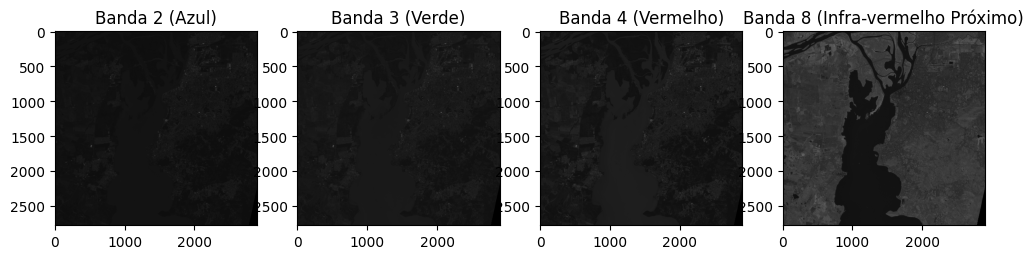

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4))
ax1.imshow(b02_image[0], cmap='gray')
ax1.set_title("Banda 2 (Azul)")
ax2.imshow(b03_image[0], cmap='gray')
ax2.set_title("Banda 3 (Verde)")
ax3.imshow(b04_image[0], cmap='gray')
ax3.set_title("Banda 4 (Vermelho)")
ax4.imshow(b08_image[0], cmap='gray')
ax4.set_title("Banda 8 (Infra-vermelho Próximo)")

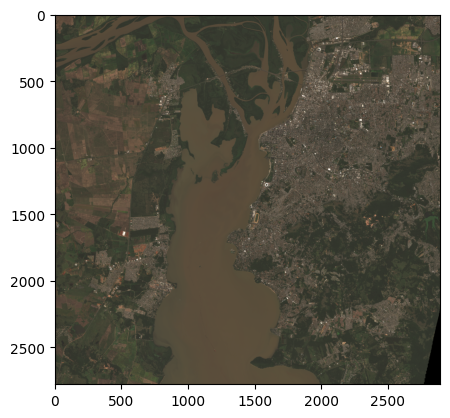

In [44]:
# cor verdadeira
rgb_normalized_stack = np.dstack(
    (normalize_and_adjust_brightness(b04_image[0], 3), 
     normalize_and_adjust_brightness(b03_image[0], 3), 
     normalize_and_adjust_brightness(b02_image[0], 3)))
plt.imshow(rgb_normalized_stack)

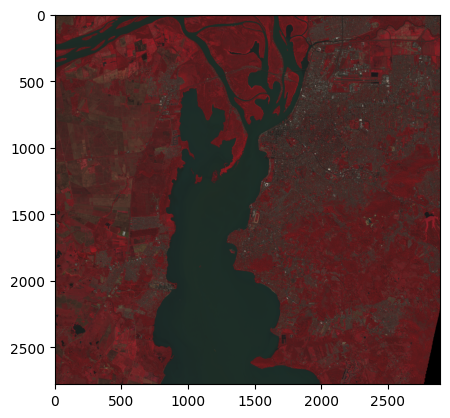

In [45]:
# falsa cor
rgb_normalized_stack = np.dstack(
    (normalize_and_adjust_brightness(b08_image[0], 1.5), 
     normalize_and_adjust_brightness(b04_image[0], 1.5), 
     normalize_and_adjust_brightness(b03_image[0], 1.5)))
plt.imshow(rgb_normalized_stack)

In [46]:
items[0]

<Item id=S2B_MSIL2A_20240506T133149_N0510_R081_T22JDM_20240506T154438>

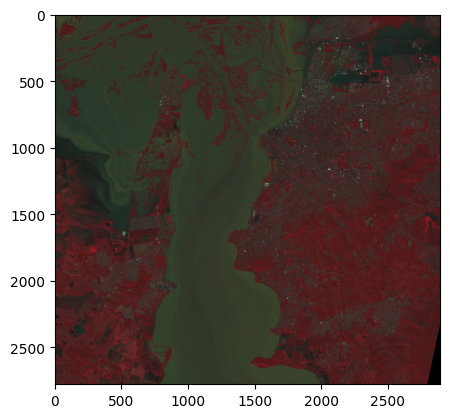

In [47]:
b03_image, _ = read_img(items[0].assets['B03'].href, bbox)
b04_image, _ = read_img(items[0].assets['B04'].href, bbox)
b08_image, _ = read_img(items[0].assets['B08'].href, bbox)

rgb_normalized_stack = np.dstack((
    normalize_and_adjust_brightness(b08_image[0], 1.5), 
    normalize_and_adjust_brightness(b04_image[0], 1.5), 
    normalize_and_adjust_brightness(b03_image[0], 1.5)))
plt.imshow(rgb_normalized_stack)

In [48]:
print(items[-1].id)
print(items[0].id)

S2A_MSIL2A_20240421T133151_N0510_R081_T22JDM_20240421T204952
S2B_MSIL2A_20240506T133149_N0510_R081_T22JDM_20240506T154438


In [49]:
camada_cena_1 = TileLayer(
    name=items[-1].id,
    url="https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}" + f"?url={items[-1].assets['TCI'].href}"
)

camada_cena_2 = TileLayer(
    name=items[0].id,
    url="https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}" + f"?url={items[0].assets['TCI'].href}"
)

mapa_comp = Map(zoom=13, scroll_wheel_zoom=True, layout=Layout(width='80%', height='500px'), center=(centroide.y, centroide.x))

mapa_comp.add(camada_poly)

control = SplitMapControl(left_layer=camada_cena_1, right_layer=camada_cena_2)

mapa_comp.add(control)

mapa_comp.add(LayersControl(position='topright'))
mapa_comp.add(FullScreenControl())
mapa_comp.add(ScaleControl(position='bottomleft'))

display(mapa_comp)

Map(center=[-30.075, -51.24999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_…

In [50]:
# visualizar area queimada
s2 = catalogo.get_collection("S2_L2A-1")

bbox = (-49.1456,-20.7272,-48.8881,-20.5765)

item_search = catalogo.search(
    collections=[s2],
    bbox=bbox,
    datetime='2024-08-21/2024-08-24',
    limit = 100
)

item_search.matched()

4

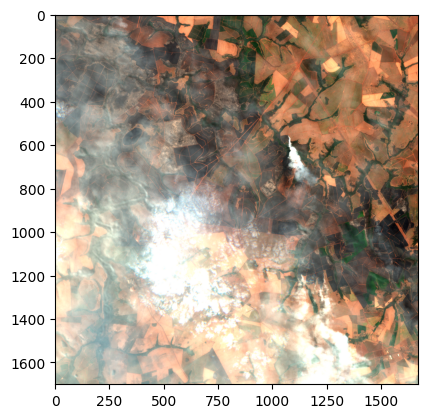

In [51]:
items = item_search.item_collection()
item = items[0]

b02_image, _ = read_img(item.assets['B02'].href, bbox)
b03_image, _ = read_img(item.assets['B03'].href, bbox)
b04_image, _ = read_img(item.assets['B04'].href, bbox)

rgb_normalized_stack = np.dstack((
    normalize_and_adjust_brightness(b04_image[0], 2.5), 
    normalize_and_adjust_brightness(b03_image[0], 2.5), 
    normalize_and_adjust_brightness(b02_image[0], 2.5)))
plt.imshow(rgb_normalized_stack)

In [52]:
camada_cena_1 = TileLayer(
    name=items[-1].id,
    url="https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}" + f"?url={items[-1].assets['TCI'].href}"
)

camada_cena_2 = TileLayer(
    name=items[0].id,
    url="https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}" + f"?url={items[0].assets['TCI'].href}"
)

mapa_comp = Map(zoom=13, scroll_wheel_zoom=True, layout=Layout(width='80%', height='500px'), center=(-20.644671936506803, -49.04365539550782))

mapa_comp.add(camada_poly)

control = SplitMapControl(left_layer=camada_cena_1, right_layer=camada_cena_2)

mapa_comp.add(control)

mapa_comp.add(LayersControl(position='topright'))
mapa_comp.add(FullScreenControl())
mapa_comp.add(ScaleControl(position='bottomleft'))

display(mapa_comp)

Map(center=[-20.644671936506803, -49.04365539550782], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [54]:
# obter uma serie temporal
# !pip install wtss==2.0.0a3
import wtss

wtss.__version__

servico = wtss.WTSS('https://data.inpe.br/bdc/wtss/v4/')
servico.coverages

['CBERS4-MUX-2M-1',
 'CBERS4-WFI-16D-2',
 'CBERS-WFI-8D-1',
 'LANDSAT-16D-1',
 'mod11a2-6.1',
 'mod13q1-6.1',
 'myd11a2-6.1',
 'myd13q1-6.1',
 'S2-16D-2']

In [55]:
# metadados
cubo_s2 = servico['S2-16D-2']
cubo_s2

Coverage Name: S2-16D-2
 
 
 
 Description: Earth Observation Data Cube generated from Copernicus Sentinel-2/MSI Level-2A product over Brazil. This dataset is provided in Cloud Optimized GeoTIFF (COG) file format. The dataset is processed with 10 meters of spatial resolution, reprojected and cropped to BDC_SM grid Version 2 (BDC_SM V2), considering a temporal compositing function of 16 days using the Least Cloud Cover First (LCF) best pixel approach.
 
 
 
 Attributes: 
 
 
 
 
 
 
 name 
 common name 
 description 
 min 
 max 
 nodata 
 scale 
 center_wavelength 
 full_width_half_max 
 data_type 
 
 
 CLEAROB 
 ClearOb 
 
 
 
 0.0 
 1.0 
 
 
 uint8 
 
 TOTALOB 
 TotalOb 
 
 
 
 0.0 
 1.0 
 
 
 uint8 
 
 PROVENANCE 
 Provenance 
 
 
 
 -1.0 
 1.0 
 
 
 int16 
 
 SCL 
 quality 
 
 
 
 0.0 
 1.0 
 
 
 uint8 
 
 B01 
 coastal 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B02 
 blue 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B04 
 red 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B08 
 nir 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B8A 
 nir08 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B09 
 nir09 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B03 
 green 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B11 
 swir16 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B12 
 swir22 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 EVI 
 evi 
 
 
 
 -9999.0 
 0.0001 
 
 
 int16 
 
 NDVI 
 ndvi 
 
 
 
 -9999.0 
 0.0001 
 
 
 int16 
 
 NBR 
 nbr 
 
 
 
 -9999.0 
 0.0001 
 
 
 int16 
 
 B05 
 rededge 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B06 
 rededge 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 B07 
 rededge 
 
 
 
 0.0 
 0.0001 
 
 
 uint16 
 
 
 
 
 
 Extent 
 
 
 
 
 xmin 
 ymin 
 xmax 
 ymax 
 
 
 -74.871069 
 -34.67556459214432 
 -28.006208041654325 
 5.763264005526926 
 
 
 
 
 
 Timeline 
 
 
 2017-01-01 2017-01-17 2017-02-02 2017-02-18 2017-03-06 2017-03-22 2017-04-07 2017-04-23 2017-05-09 2017-05-25 2017-06-10 2017-06-26 2017-07-12 2017-07-28 2017-08-13 2017-08-29 2017-09-14 2017-09-30 2017-10-16 2017-11-01 2017-11-17 2017-12-03 2017-12-19 2018-01-01 2018-01-17 2018-02-02 2018-02-18 2018-03-06 2018-03-22 2018-04-07 2018-04-23 2018-05-09 2018-05-25 2018-06-10 2018-06-26 2018-07-12 2018-07-28 2018-08-13 2018-08-29 2018-09-14 2018-09-30 2018-10-16 2018-11-01 2018-11-17 2018-12-03 2018-12-19 2019-01-01 2019-01-17 2019-02-02 2019-02-18 2019-03-06 2019-03-22 2019-04-07 2019-04-23 2019-05-09 2019-05-25 2019-06-10 2019-06-26 2019-07-12 2019-07-28 2019-08-13 2019-08-29 2019-09-14 2019-09-30 2019-10-16 2019-11-01 2019-11-17 2019-12-03 2019-12-19 2020-01-01 2020-01-17 2020-02-02 2020-02-18 2020-03-05 2020-03-21 2020-04-06 2020-04-22 2020-05-08 2020-05-24 2020-06-09 2020-06-25 2020-07-11 2020-07-27 2020-08-12 2020-08-28 2020-09-13 2020-09-29 2020-10-15 2020-10-31 2020-11-16 2020-12-02 2020-12-18 2021-01-01 2021-01-17 2021-02-02 2021-02-18 2021-03-06 2021-03-22 2021-04-07 2021-04-23 2021-05-09 2021-05-25 2021-06-10 2021-06-26 2021-07-12 2021-07-28 2021-08-13 2021-08-29 2021-09-14 2021-09-30 2021-10-16 2021-11-01 2021-11-17 2021-12-03 2021-12-19 2022-01-01 2022-01-17 2022-02-02 2022-02-18 2022-03-06 2022-03-22 2022-04-07 2022-04-23 2022-05-09 2022-05-25 2022-06-10 2022-06-26 2022-07-12 2022-07-28 2022-08-13 2022-08-29 2022-09-14 2022-09-30 2022-10-16 2022-11-01 2022-11-17 2022-12-03 2022-12-19 2023-01-01 2023-01-17 2023-02-02 2023-02-18 2023-03-06 2023-03-22 2023-04-07 2023-04-23 2023-05-09 2023-05-25 2023-06-10 2023-06-26 2023-07-12 2023-07-28 2023-08-13 2023-08-29 2023-09-14 2023-09-30 2023-10-16 2023-11-01 2023-11-17 2023-12-03 2023-12-19 2024-01-01 2024-01-17 2024-02-02 2024-02-18 2024-03-05 2024-03-21 2024-04-06 2024-04-22 2024-05-08 2024-05-24 2024-06-09 2024-06-25 2024-07-11 2024-07-27 2024-08-12 2024-08-28 2024-09-13 2024-09-29 2024-10-15 2024-10-31 2024-11-16 2024-12-02 2024-12-18 2025-01-01 2025-01-17 2025-02-02 2025-02-18 2025-03-06 2025-03-22 2025-04-07 2025-04-23 2025-05-09

In [56]:

cubo_s2.name

'S2-16D-2'

In [57]:

cubo_s2.description

'Earth Observation Data Cube generated from Copernicus Sentinel-2/MSI Level-2A product over Brazil. This dataset is provided in Cloud Optimized GeoTIFF (COG) file format. The dataset is processed with 10 meters of spatial resolution, reprojected and cropped to BDC_SM grid Version 2 (BDC_SM V2), considering a temporal compositing function of 16 days using the Least Cloud Cover First (LCF) best pixel approach.'

In [58]:
cubo_s2.attributes

[{'name': 'CLEAROB',
  'common_name': 'ClearOb',
  'scale': 1.0,
  'scale_add': None,
  'nodata': 0.0,
  'data_type': 'uint8',
  'resolution_x': 10.0,
  'resolution_y': 10.0,
  'min_value': 1.0,
  'max_value': 255.0},
 {'name': 'TOTALOB',
  'common_name': 'TotalOb',
  'scale': 1.0,
  'scale_add': None,
  'nodata': 0.0,
  'data_type': 'uint8',
  'resolution_x': 10.0,
  'resolution_y': 10.0,
  'min_value': 1.0,
  'max_value': 255.0},
 {'name': 'PROVENANCE',
  'common_name': 'Provenance',
  'scale': 1.0,
  'scale_add': None,
  'nodata': -1.0,
  'data_type': 'int16',
  'resolution_x': 10.0,
  'resolution_y': 10.0,
  'min_value': 1.0,
  'max_value': 366.0},
 {'name': 'SCL',
  'common_name': 'quality',
  'scale': 1.0,
  'scale_add': None,
  'nodata': 0.0,
  'data_type': 'uint8',
  'resolution_x': 10.0,
  'resolution_y': 10.0,
  'min_value': 0.0,
  'max_value': 11.0},
 {'name': 'B01',
  'common_name': 'coastal',
  'scale': 0.0001,
  'scale_add': None,
  'nodata': 0.0,
  'data_type': 'uint16',

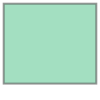

In [59]:

cubo_s2.spatial_extent

In [60]:
timeline = cubo_s2.timeline

ultima_data_disponivel = timeline[0]
primeira_data_disponivel = timeline[-1]

print(f'Intervalo: [{primeira_data_disponivel}, {ultima_data_disponivel}]')

Intervalo: [2025-05-09, 2017-01-01]


In [62]:
# recuperando a serie temporal

lon, lat = -49.04517889022828, -20.62702079798649

ts_search = cubo_s2.ts(attributes=['NDVI'],
                       latitude=lat, longitude=lon,
                       start_date='2019-01-01', end_date='2025-05-26')
ts_search

TimeSeriesSearch(coverage=Coverage(service=wtss(url="https://data.inpe.br/bdc/wtss/v4/",validate=False,access_token=None), id=S2-16D-2), query=TimeSeriesQuery(params={}, attributes=['NDVI'], start_datetime='2019-01-01T00:00:00Z', end_datetime='2025-05-26T00:00:00Z', geom=<POINT (-49.045 -20.627)>, pagination='P3M'), _pagination=None, _ts=None, _df=None)

In [63]:
ts = ts_search.ts
ts

Time Series: S2-16D-2
 


 


 <!-- Print the timeline -->
 
 timeline 
 
 
 
 2019-01-01 2019-01-17 2019-02-02 2019-02-18 2019-03-06 2019-03-22 2019-04-07 2019-04-23 2019-05-09 2019-05-25 2019-06-10 2019-06-26 2019-07-12 2019-07-28 2019-08-13 2019-08-29 2019-09-14 2019-09-30 2019-10-16 2019-11-01 2019-11-17 2019-12-03 2019-12-19 2020-01-01 2020-01-17 2020-02-02 2020-02-18 2020-03-05 2020-03-21 2020-04-06 2020-04-22 2020-05-08 2020-05-24 2020-06-09 2020-06-25 2020-07-11 2020-07-27 2020-08-12 2020-08-28 2020-09-13 2020-09-29 2020-10-15 2020-10-31 2020-11-16 2020-12-02 2020-12-18 2021-01-01 2021-01-17 2021-02-02 2021-02-18 2021-03-06 2021-03-22 2021-04-07 2021-04-23 2021-05-09 2021-05-25 2021-06-10 2021-06-26 2021-07-12 2021-07-28 2021-08-13 2021-08-29 2021-09-14 2021-09-30 2021-10-16 2021-11-01 2021-11-17 2021-12-03 2021-12-19 2022-01-01 2022-01-17 2022-02-02 2022-02-18 2022-03-06 2022-03-22 2022-04-07 2022-04-23 2022-05-09 2022-05-25 2022-06-10 2022-06-26 2022-07-12 2022-07-28 2022-08-13 2022-08-29 2022-09-14 2022-09-30 2022-10-16 2022-11-01 2022-11-17 2022-12-03 2022-12-19 2023-01-01 2023-01-17 2023-02-02 2023-02-18 2023-03-06 2023-03-22 2023-04-07 2023-04-23 2023-05-09 2023-05-25 2023-06-10 2023-06-26 2023-07-12 2023-07-28 2023-08-13 2023-08-29 2023-09-14 2023-09-30 2023-10-16 2023-11-01 2023-11-17 2023-12-03 2023-12-19 2024-01-01 2024-01-17 2024-02-02 2024-02-18 2024-03-05 2024-03-21 2024-04-06 2024-04-22 2024-05-08 2024-05-24 2024-06-09 2024-06-25 2024-07-11 2024-07-27 2024-08-12 2024-08-28 2024-09-13 2024-09-29 2024-10-15 2024-10-31 2024-11-16 2024-12-02 2024-12-18 2025-01-01 2025-01-17 2025-02-02 2025-02-18 2025-03-06 2025-03-22 2025-04-07 2025-04-23 
 
 


 


 
 Time Series: 
 
 <!-- Print the table for each attribute -->
 
 
 NDVI 
 
 
 <!-- Set the columns names -->
 
 pixel id 
 timeseries 
 
 
 <!-- The table data will contain a maximum of 5 items -->
 
 
 0 
 [0.7193, 0.733, 0.6684, 0.7699, 0.7913, 0.7957, 0.7829, 0.7853, 0.794, 0.1839, 0.2106, 0.2368, 0.2032, 0.2209, 0.2252, 0.2545, 0.2766, 0.2855, 0.347, 0.4519, 0.5311, 0.5921, 0.6673, 0.5577, 0.7407, 0.7679, 0.2105, 0.7729, 0.7707, 0.7684, 0.7685, 0.683, 0.6601, 0.639, 0.5733, 0.5112, 0.226, 0.1761, 0.1751, 0.157, 0.1454, 0.1709, 0.1533, 0.2058, 0.3192, 0.3244, 0.161, 0.1487, 0.082, 0.0967, 0.2171, 0.3851, 0.5374, 0.6187, 0.6853, 0.7132, 0.7423, 0.2952, 0.2365, 0.1909, 0.2109, 0.2556, 0.283, 0.272, 0.3145, 0.5033, 0.6401, 0.7496, 0.8012, 0.8272, 0.8424, 0.832, 0.832, 0.8613, 0.8265, 0.7721, 0.7666, 0.6864, 0.2835, 0.2201, 0.2165, 0.221, 0.2336, 0.2541, 0.288, 0.2839, 0.3609, 0.4251, 0.4716, 0.5326, 0.6885, 0.7402, 0.7842, 0.724, 0.7949, 0.8148, 0.2524, 0.8448, 0.8245, 0.8067, 0.281, 0.216, 0.2212, 0.226, 0.2594, 0.2765, 0.3245, 0.4043, 0.4189, 0.5882, 0.6385, 0.7174, 0.7164, 0.8129, 0.8121, 0.8131, 0.7835, 0.8004, 0.8326, 0.8047, 0.6065, 0.8125, 0.7921, 0.7657, 0.2382, 0.2326, 0.2533, 0.2534, 0.2618, 0.2549, 0.1674, 0.1722, 0.1909, 0.227, 0.2315, 0.2674, 0.4266, 0.0014, 0.639, 0.5869, 0.7666, 0.7805, 0.7481, 0.7998, 0.8299, 0.2349]

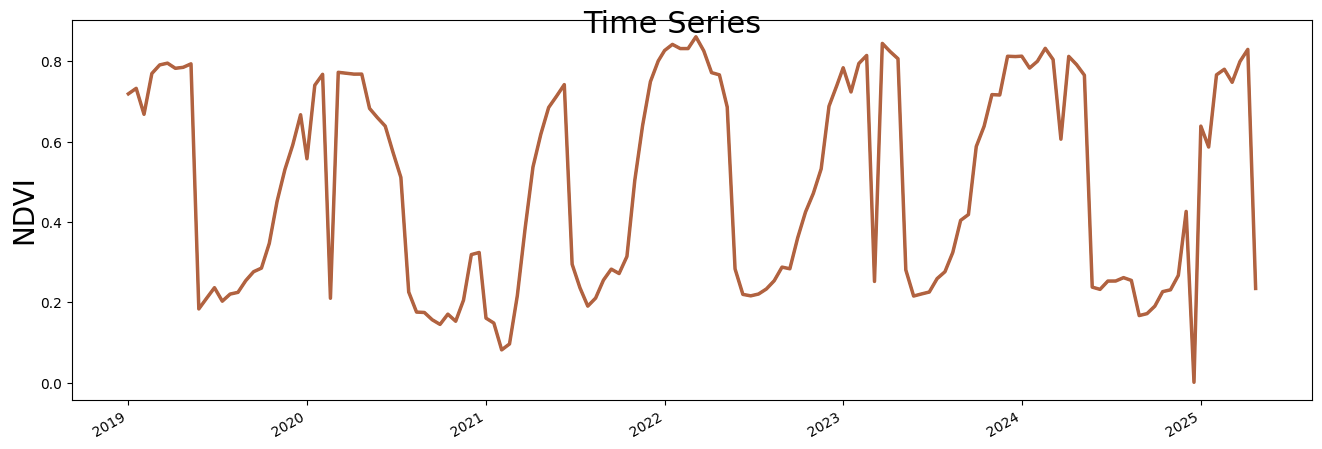

In [64]:

ts_search.plot()

In [65]:
ts.timeline

['2019-01-01',
 '2019-01-17',
 '2019-02-02',
 '2019-02-18',
 '2019-03-06',
 '2019-03-22',
 '2019-04-07',
 '2019-04-23',
 '2019-05-09',
 '2019-05-25',
 '2019-06-10',
 '2019-06-26',
 '2019-07-12',
 '2019-07-28',
 '2019-08-13',
 '2019-08-29',
 '2019-09-14',
 '2019-09-30',
 '2019-10-16',
 '2019-11-01',
 '2019-11-17',
 '2019-12-03',
 '2019-12-19',
 '2020-01-01',
 '2020-01-17',
 '2020-02-02',
 '2020-02-18',
 '2020-03-05',
 '2020-03-21',
 '2020-04-06',
 '2020-04-22',
 '2020-05-08',
 '2020-05-24',
 '2020-06-09',
 '2020-06-25',
 '2020-07-11',
 '2020-07-27',
 '2020-08-12',
 '2020-08-28',
 '2020-09-13',
 '2020-09-29',
 '2020-10-15',
 '2020-10-31',
 '2020-11-16',
 '2020-12-02',
 '2020-12-18',
 '2021-01-01',
 '2021-01-17',
 '2021-02-02',
 '2021-02-18',
 '2021-03-06',
 '2021-03-22',
 '2021-04-07',
 '2021-04-23',
 '2021-05-09',
 '2021-05-25',
 '2021-06-10',
 '2021-06-26',
 '2021-07-12',
 '2021-07-28',
 '2021-08-13',
 '2021-08-29',
 '2021-09-14',
 '2021-09-30',
 '2021-10-16',
 '2021-11-01',
 '2021-11-

In [66]:

ts.attributes

['NDVI']

In [67]:

ts.values('NDVI')[0]

[0.7193,
 0.733,
 0.6684,
 0.7699,
 0.7913,
 0.7957,
 0.7829,
 0.7853,
 0.794,
 0.1839,
 0.2106,
 0.2368,
 0.2032,
 0.2209,
 0.2252,
 0.2545,
 0.2766,
 0.2855,
 0.347,
 0.4519,
 0.5311,
 0.5921,
 0.6673,
 0.5577,
 0.7407,
 0.7679,
 0.2105,
 0.7729,
 0.7707,
 0.7684,
 0.7685,
 0.683,
 0.6601,
 0.639,
 0.5733,
 0.5112,
 0.226,
 0.1761,
 0.1751,
 0.157,
 0.1454,
 0.1709,
 0.1533,
 0.2058,
 0.3192,
 0.3244,
 0.161,
 0.1487,
 0.082,
 0.0967,
 0.2171,
 0.3851,
 0.5374,
 0.6187,
 0.6853,
 0.7132,
 0.7423,
 0.2952,
 0.2365,
 0.1909,
 0.2109,
 0.2556,
 0.283,
 0.272,
 0.3145,
 0.5033,
 0.6401,
 0.7496,
 0.8012,
 0.8272,
 0.8424,
 0.832,
 0.832,
 0.8613,
 0.8265,
 0.7721,
 0.7666,
 0.6864,
 0.2835,
 0.2201,
 0.2165,
 0.221,
 0.2336,
 0.2541,
 0.288,
 0.2839,
 0.3609,
 0.4251,
 0.4716,
 0.5326,
 0.6885,
 0.7402,
 0.7842,
 0.724,
 0.7949,
 0.8148,
 0.2524,
 0.8448,
 0.8245,
 0.8067,
 0.281,
 0.216,
 0.2212,
 0.226,
 0.2594,
 0.2765,
 0.3245,
 0.4043,
 0.4189,
 0.5882,
 0.6385,
 0.7174,
 0.7164,
 0

In [68]:
ts_search = cubo_s2.ts(attributes=['NDVI', 'SCL'],
                       latitude=lat, longitude=lon,
                       start_date='2018-01-01', end_date='2025-05-26')
ts = ts_search.ts

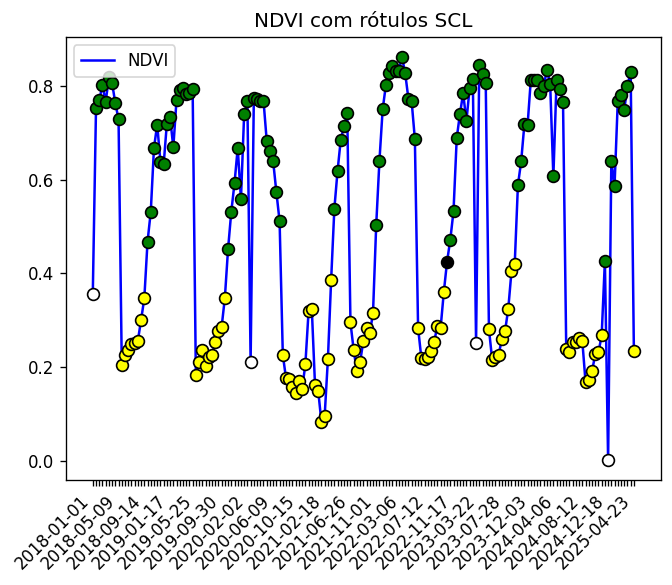

In [69]:
plt.figure(dpi = 120)

serie = ts.values('NDVI')[0]
cloud_mask_serie = ts.values('SCL')[0]
timeline = ts.timeline

plt.plot(serie, color='blue', label = 'NDVI')

scl_colors = {
    '0': 'black',  #Nodata
    '1': 'red',    #Saturated or defective
    '2': 'gray',   #Dark area pixels
    '3': 'brown',  #Cloud Shadow
    '4': 'green',  #Vegetation
    '5': 'yellow', #Not Vegetated
    '6': 'blue',   #Water
    '7': 'red',    #Unclassified
    '8': 'white',  #Cloud Medium Probability
    '9': 'white',  #Cloud High Probability
    '10': 'cyan',  #Thin Cirrus
    '11': 'pink'   #Snow
}

for idx, scl_value in enumerate(cloud_mask_serie):
    color = scl_colors[str(int(scl_value))]
    plt.scatter(idx, serie[idx], edgecolor='black', color=color, s=50, zorder=5)

step = 8

labels = [timeline[i] if i % step == 0 else '' for i in range(len(timeline))]

plt.xticks(ticks=range(len(timeline)),
           labels=labels,
           rotation=45, ha='right')

plt.title('NDVI com rótulos SCL')
plt.legend()
plt.show()

In [70]:
mask = np.isin(np.array(cloud_mask_serie), [4, 5, 6])
scl_serie = np.array(cloud_mask_serie)[mask]
filtered_serie = np.array(serie)[mask]
timeline_serie = np.array(timeline)[mask]

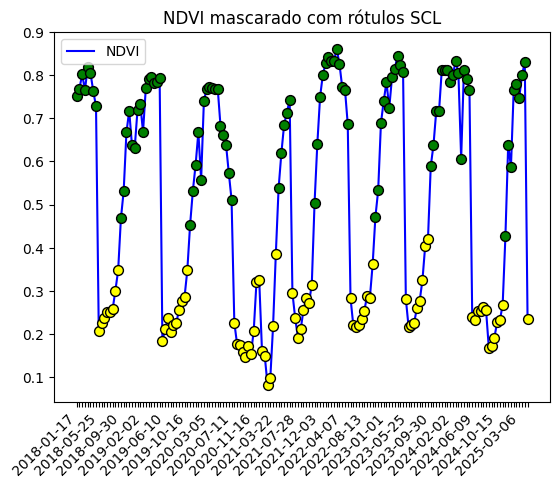

In [71]:
plt.plot(filtered_serie, color='blue', label = 'NDVI')

for idx, scl_value in enumerate(scl_serie):
    color = scl_colors[str(int(scl_value))]
    plt.scatter(idx, filtered_serie[idx], edgecolor='black', color=color, s=50, zorder=5)

step = 8
labels = [timeline_serie[i] if i % step == 0 else '' for i in range(len(timeline_serie))]

plt.xticks(ticks=range(len(timeline_serie)),
           labels=labels,
           rotation=45, ha='right')

plt.title('NDVI mascarado com rótulos SCL')
plt.legend()
plt.show()


In [72]:
# recuperando a serie temporal de uma area
from shapely.geometry import box

geom = box(-49.0461,-20.6277,-49.0445,-20.6263)

ts_search = cubo_s2.ts(attributes=['NDVI', 'B08'],
                       geom=geom,
                       start_date='2019-01-01', end_date='2024-12-31')
ts_search

TimeSeriesSearch(coverage=Coverage(service=wtss(url="https://data.inpe.br/bdc/wtss/v4/",validate=False,access_token=None), id=S2-16D-2), query=TimeSeriesQuery(params={}, attributes=['NDVI', 'B08'], start_datetime='2019-01-01T00:00:00Z', end_datetime='2024-12-31T00:00:00Z', geom=<POLYGON ((-49.044 -20.628, -49.044 -20.626, -49.046 -20.626, -49.046 -20.62...>, pagination='P3M'), _pagination=None, _ts=None, _df=None)

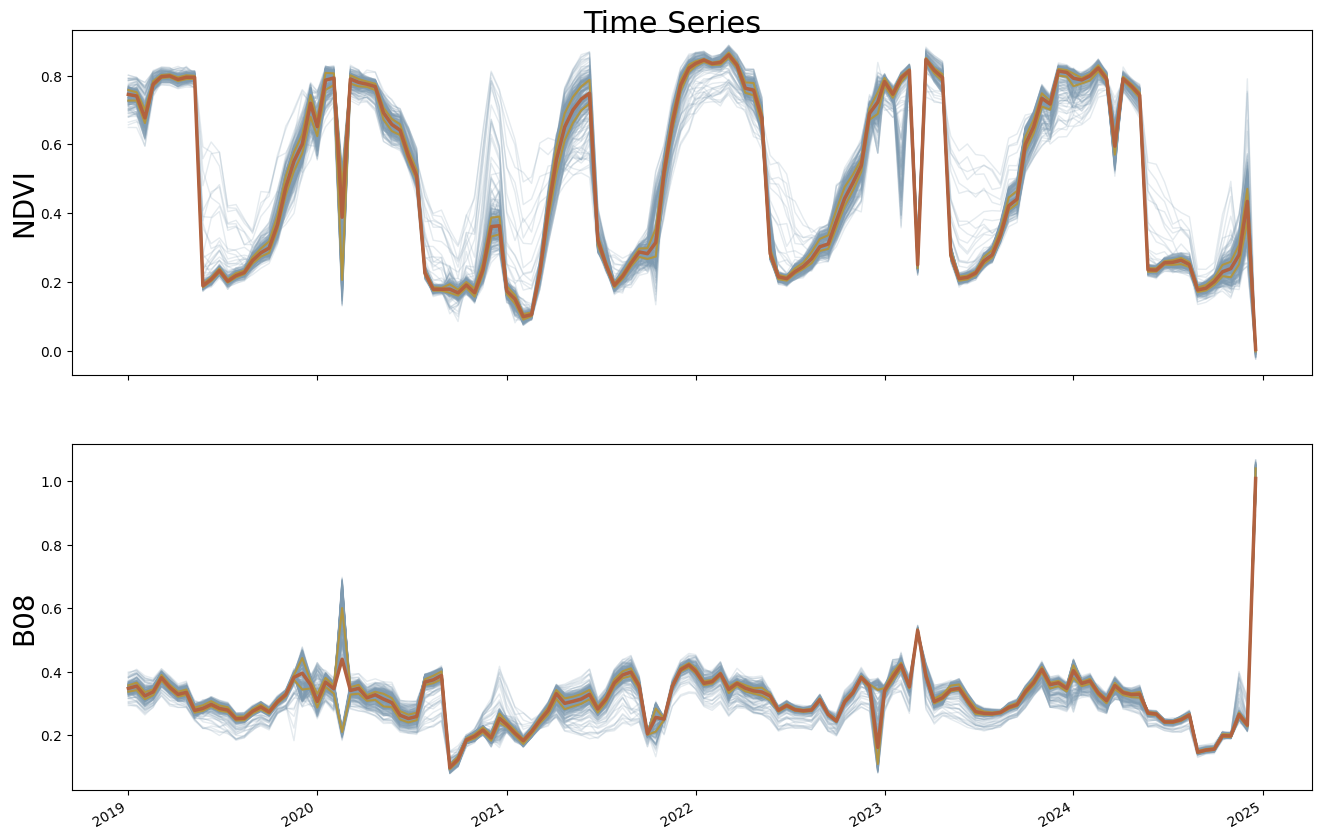

In [73]:

ts_search.plot()

In [75]:
ts = ts_search.ts
# ts

ts.values('NDVI') # Todas as séries

ts.values('NDVI')[0] # Primeira série

ts.values('NDVI')[1] # Segunda série

[0.7369,
 0.7466,
 0.69,
 0.7814,
 0.8008,
 0.8033,
 0.7948,
 0.7986,
 0.7997,
 0.1855,
 0.2063,
 0.2181,
 0.1992,
 0.2068,
 0.2128,
 0.2429,
 0.2762,
 0.2885,
 0.3563,
 0.47,
 0.5491,
 0.6006,
 0.7449,
 0.6363,
 0.8144,
 0.8149,
 0.5116,
 0.8044,
 0.7953,
 0.7931,
 0.7872,
 0.7217,
 0.6887,
 0.6678,
 0.5854,
 0.5192,
 0.2233,
 0.1723,
 0.1745,
 0.182,
 0.1698,
 0.1741,
 0.154,
 0.2119,
 0.3523,
 0.3324,
 0.1603,
 0.1528,
 0.1092,
 0.1213,
 0.2484,
 0.4349,
 0.592,
 0.6859,
 0.741,
 0.7624,
 0.7861,
 0.3238,
 0.243,
 0.1957,
 0.2357,
 0.2738,
 0.306,
 0.3095,
 0.3653,
 0.5609,
 0.703,
 0.8002,
 0.8418,
 0.8408,
 0.8477,
 0.8362,
 0.8408,
 0.8595,
 0.8274,
 0.7849,
 0.7792,
 0.6949,
 0.3202,
 0.2088,
 0.1986,
 0.2226,
 0.2399,
 0.2707,
 0.3162,
 0.3236,
 0.3895,
 0.4525,
 0.512,
 0.5608,
 0.7132,
 0.7141,
 0.7952,
 0.7433,
 0.6487,
 0.8161,
 0.257,
 0.8482,
 0.8044,
 0.7832,
 0.2666,
 0.2001,
 0.2005,
 0.2126,
 0.2516,
 0.2694,
 0.33,
 0.4213,
 0.4457,
 0.608,
 0.6594,
 0.7408,
 0.7282,